<center>
<img
src="https://i.ibb.co/th5MTcv/logo.png" width="800" 
     />
</center>

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

## Equations of motion of a particle in Schwarzschild's background

The equations of motion for a particle moving in the Schwarzschild spacetime obtained from the Hamiltonian formulation are

\begin{align}
\dot{t} = & \frac{\varepsilon}{1-\frac{2M}{r}}\\
\dot{r} = & \left(1 - \frac{2M}{r} \right)p_1\\
\dot{\theta} = &\frac{p_2}{r^2}\\
\dot{\phi} = &\frac{\ell}{r^2 \sin^2\theta}\\
\dot{p}_t = & 0\\
\dot{p}_r = & - \frac{M}{(r-2M)^2} \varepsilon^2 - \frac{M}{r^2}p_r ^2 + \frac{1}{r^3}p_\theta ^2 + \frac{1}{r^3 \sin^2 \theta}\ell^2\\
\dot{p}_\theta = &\frac{\cos \theta}{r^2 \sin^3 \theta} \ell^2\\
\dot{p}_\phi = & 0
\end{align}

where we have identified the conserved quantities as

- Energy : $\varepsilon = - p_t$ 
- z-component of the angular momentum : $\ell = p_\phi$ 


### Initial Conditions 

The initial conditions may be given as the set of values: 

$\{ t_0, r_0, \theta_0, \phi_0, \varepsilon, \ell, p^\theta_0 \}$

It is clear that these conditions define the following components of the initial momentum:

\begin{align}
(p_t)_0 = & -\varepsilon \\
(p_\theta)_0 = & g_{\theta \theta} p^\theta_0 = r_0^2 p^\theta_0 \\
(p_\phi)_0 = & \ell
\end{align}

The remaining component of the initial momentum is obtained from a normalization conidition. For massive particles we use $g^{\mu \nu}p_\mu p_\nu = -1$ while for photons, we have $g^{\mu \nu}p_\mu p_\nu = 0$. Hence, we can write the condition
as

\begin{equation}
g^{\mu \nu}p_\mu p_\nu = - \delta
\end{equation}
where $\delta = 1$ for massive particles and $\delta = 0$ for massless particles.

The normalization condition gives

\begin{equation}
(p_r)_0 = \left[ \frac{1}{1 - \frac{2M}{r_0}} \left( -\delta + \frac{\varepsilon^2}{1-\frac{2M}{r_0}} - \frac{(p_\theta)_0^2}{r_0^2} - \frac{\ell^2}{r_0^2 \sin^2 \theta_0} \right)\right]^\frac{1}{2}
\end{equation}



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy import sin, cos, pi, sqrt



def geodesics(tau, x, M=1.):
    '''
    This function contains the geodesic equations in Hamiltonian form 
    for the Schwarzschild metric.
    Momentum compontens use lower indices
    '''
    # Coordinates and momentum components
    t = x[0]
    r = x[1]
    theta = x[2]
    phi = x[3]
    p_t = x[4]
    p_r = x[5]
    p_th = x[6]
    p_phi = x[7]

    # Conserved Quantities
    E = - p_t
    L = p_phi

    # Geodesics differential equations 
    dtdtau = E/(1 - 2*M/r)
    drdtau = (1 - 2*M/r)*p_r
    dthdtau = p_th/r**2
    dphidtau = L/((r*sin(theta))**2)
    
    dp_tdtau = 0.
    dp_rdtau = - M*(E/(r-2*M))**2 - M*(p_r/r)**2 + p_th**2/r**3 + L**2/((r**3)*sin(theta)**2)  
    dp_thdtau = (cos(theta)/sin(theta)**3)*(L/r)**2
    dp_phidtau = 0.
    

    return np.array([dtdtau, drdtau, dthdtau, dphidtau, 
              dp_tdtau, dp_rdtau, dp_thdtau, dp_phidtau])


def initCond(t0, r0, th0, phi0, pth0, energy, angmomentum, M=1.):
    '''
    This function prepares the initial values of coordinates and momentum to
    solve the geodesic equations.
    
    Input    
    x: initial coordinates 
    energy 
    angmumentum
    pth: initial momentum component in the theta direction
    Returns
    [t, r, theta, phi, p_t, p_r, p_theta, p_phi] :initial conditions needed to solve 
    the geodesic equations (with covariant components of the momentum vector)
    '''
    
    # momentum components
    p_t0 = - energy
    p_r0 = sqrt((-1 + energy**2/(1-2*M/r0) - (p_th0/r0)**2 - (angmomentum/(r0*sin(th0)))**2)/(1 - 2*M/r0))
    p_th0 = r0**2*pth0
    p_phi0 = angmomentum
    
    return [t0, r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]


## Equatorial Orbits

Is is possible to restrict the motion of the particle to the equatorial plane by imposing the initial conditions $\theta_0 = \frac{\pi}{2}$ and $p^\theta_0 = 0$. Under these assumptions the equations of motion reduce to

\begin{align}
\dot{t} = & \frac{\varepsilon}{1-\frac{2M}{r}}\\
\dot{r} = & \left(1 - \frac{2M}{r} \right)p_1\\
\dot{\phi} = &\frac{\ell}{r^2}\\
\dot{p}_t = & 0\\
\dot{p}_r = & - \frac{M}{(r-2M)^2} \varepsilon^2 - \frac{M}{r^2}p_r ^2  + \frac{1}{r^3}\ell^2\\
\dot{p}_\phi = & 0
\end{align}

In order to erstablish the initial condition for a particular orbit, it is possible to use the effective potential, which is defined as

\begin{equation}
V_{eff} (r) = \left(1 - \frac{2M}{r} \right) \left(1 + \frac{\ell^2}{r^2} \right) .
\end{equation}

We can define the initial conditions by considering one of the return points in the orbit (apsis). At these points we have $p^r_{\text{(apsis)}} = 0$.


Energy: 0.985557980767601
Initial conditions: [0.0, 13.0, 1.5707963267948966, 0.0, -0.985557980767601, 0.0, 0.0, 5]


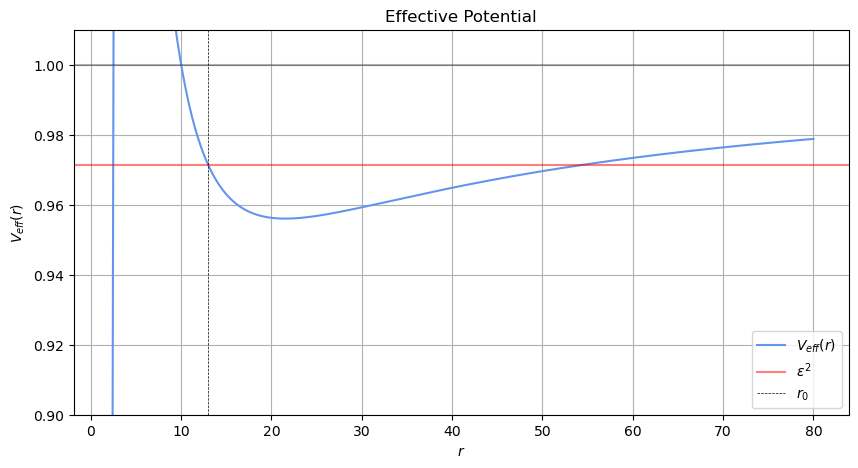

In [42]:

def Veff(r, L, M=1.):
    '''
    Effective Potential
    '''
    return (1 - 2*M/r)*(1 + (L/r)**2)


# Mass of the central object
M = 1.

# Initial condition at one of the apsis
r0 = 13.
p_r0 = 0.

th0 = pi/2
p_th0 = 0.

phi0 = 0.

angmomentum = 5

energy = sqrt(Veff(r0, L=angmomentum, M=M))
print('Energy:',energy)

p_t0 = - energy
p_phi0 = angmomentum


x0 = [0., r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]
print('Initial conditions:', x0)

rrange = np.linspace(2,80,1000)
plt.figure(figsize=(10,5))
plt.plot(rrange, Veff(rrange, L=angmomentum, M=M), color='cornflowerblue', label= r'$V_{eff}(r)$')

plt.axhline(1, color = 'black', alpha=0.3)
plt.axhline(energy**2, color = 'red', alpha=0.5, label=r'$\varepsilon^2$')
plt.axvline(r0, color='black',linewidth=0.5, linestyle='--', label=r'$r_0$')

plt.title('Effective Potential')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{eff}(r)$')
plt.grid()
plt.ylim(0.9,1.01)
plt.legend()

plt.show()
    

In [43]:
# Normalization of the momentum
- energy**2/(1-2*M/r0) + (1 - 2*M/r0)*p_r0**2+ (p_th0/r0)**2 + (angmomentum/(r0*sin(th0)))**2


-1.0

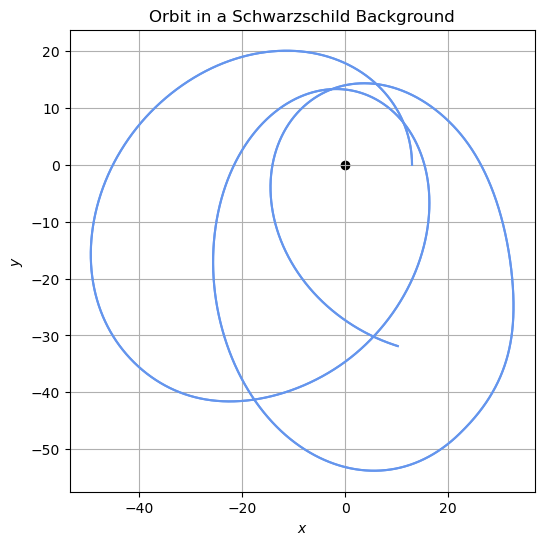

In [87]:
tau_i = 0.
tau_f = 2800.
n = 1000000

tau_range = np.linspace(tau_i, tau_f,n)

sol = solve_ivp(geodesics, [tau_i, tau_f], x0, t_eval = tau_range)

#Cartesian Coodinates Solution
solx = sol.y[1]*np.cos(sol.y[3])
soly = sol.y[1]*np.sin(sol.y[3])

plt.figure(figsize=(6,6))
plt.scatter(0,0, color='black')
plt.plot(solx[::100], soly[::100], color='cornflowerblue')
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Orbit in a Schwarzschild Background')
plt.grid()
plt.show()

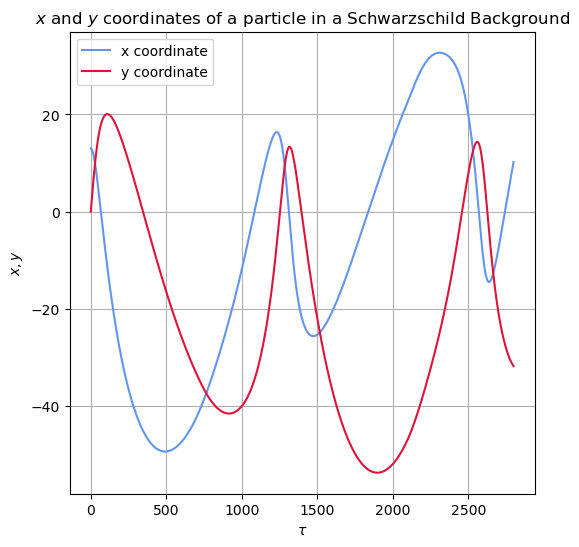

In [88]:
plt.figure(figsize=(6,6))
plt.plot(tau_range[::100], solx[::100], color='cornflowerblue', label='x coordinate')
plt.plot(tau_range[::100], soly[::100], color='crimson', label='y coordinate')
plt.xlabel(r'$\tau$')

plt.ylabel(r'$x,y$')
plt.title(r'$x$ and $y$ coordinates of a particle in a Schwarzschild Background')
plt.grid()
plt.legend()
plt.show()

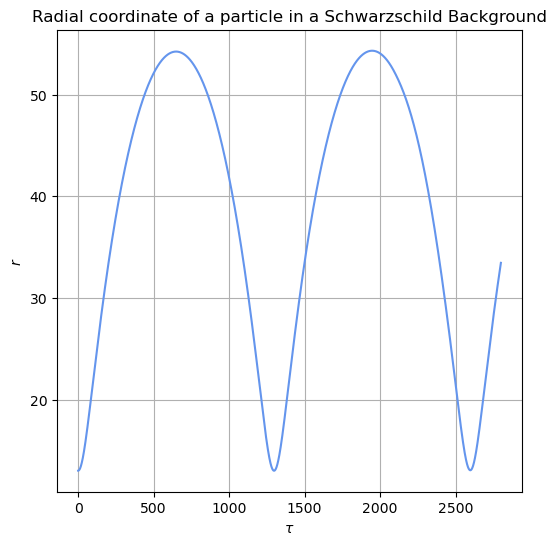

In [89]:
solr = sqrt(solx**2 + soly**2)
plt.figure(figsize=(6,6))
plt.plot(tau_range[::100], solr[::100], color='cornflowerblue')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$r$')
plt.title(r'Radial coordinate of a particle in a Schwarzschild Background')
plt.grid()
plt.show()

## Circular Orbits

From the effective potential, a circular orbit is defined by the condition
\begin{equation}
\left. \frac{dV_{eff}}{dr}\right|_{r=r_c} = 0
\end{equation}

which gives the radius of the circular orbit for a given value of the angular momentum, $\ell$,

\begin{equation}
r_c = \frac{\ell^2}{2M} \left[ 1 + \sqrt{1- \frac{12M^2}{\ell^2}} \right]
\end{equation}

Circular orbit radius: 21.513878188659973
Energy: 0.9777673612178128


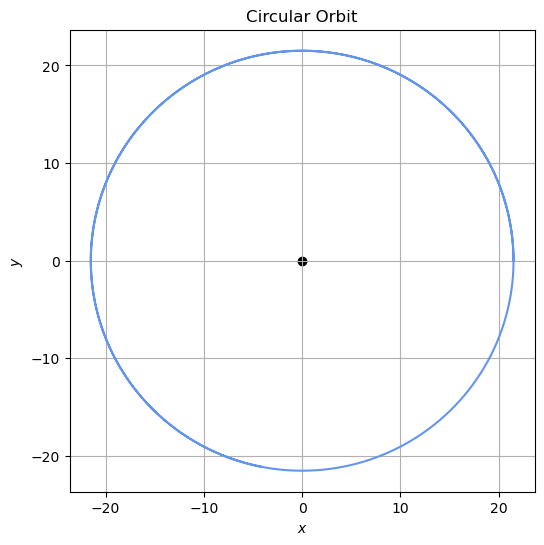

In [90]:
# Equatorial Circular Orbit

# Mass of the central object
M = 1.

# Angular Momentum
angmomentum = 5.

# Radius of the Circular orbit
r0 = (angmomentum**2/(2*M))* (1 + sqrt( 1 - 12*(M/angmomentum)**2))
print('Circular orbit radius:', r0)


# Initial conditions
p_r0 = 0.

th0 = np.pi/2
p_th0 = 0.

phi0 = 0.

p_phi0 = angmomentum


energy = sqrt(Veff(r0, L=angmomentum, M=M))
p_t0 = - energy
print('Energy:',energy)

x0 = [0., r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]



tau_i = 0.
tau_f = 1000.
n = 1000000



sol = solve_ivp(geodesics, [tau_i, tau_f], x0, t_eval = np.linspace(tau_i, tau_f,n))

#Cartesian Coodinates Solution
solx = sol.y[1]*np.cos(sol.y[3])
soly = sol.y[1]*np.sin(sol.y[3])


plt.figure(figsize=(6,6))
plt.scatter(0,0, color='black')
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Circular Orbit')
plt.grid()
plt.show()

In [91]:
# Normalization of the momentum
- energy**2/(1-2*M/r0) + (1 - 2*M/r0)*p_r0**2+ (p_th0/r0)**2 + (angmomentum/(r0*sin(th0)))**2


-1.0

### ISCO

The **I**nnermost **S**table **C**ircular **O**rbit (**ISCO**) is defined through the conditions
\begin{equation}
\begin{cases}
\left. \frac{dV_{eff}}{dr} \right|_{r=r_{ISCO}, \ell = \ell_{ISCO}} = &0\\
\left. \frac{d^2V_{eff}}{dr^2}\right|_{r=r_{ISCO}, \ell = \ell_{ISCO}} = &0 .
\end{cases}
\end{equation}

This gives the radius, angular momentum and energy for this orbit as
\begin{align}
r_{ISCO} = & 6M \\
\ell_{ISCO} = & \sqrt{12} M\\
\varepsilon_{ISCO} = & \sqrt{\frac{8}{9}} .
\end{align}

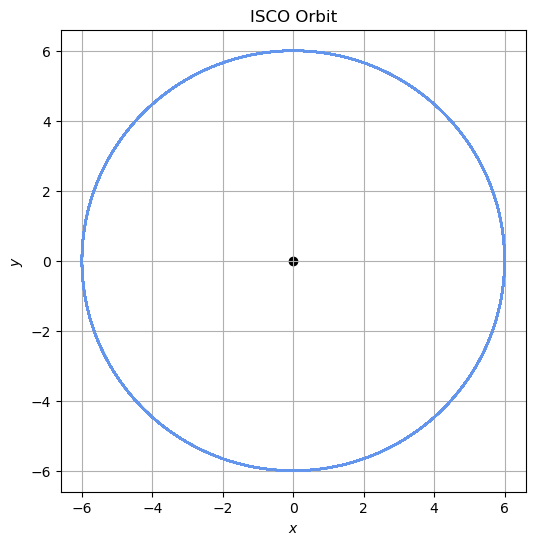

In [92]:
# ISCO

# Mass of the central object
M = 1.

# Initial condition at the ISCO
r0 = 6.*M
p_r0 = 0.

th0 = np.pi/2
p_th0 = 0.

phi0 = 0.

angmomentum = M*np.sqrt(12)
energy = np.sqrt(8./9.)
p_t0 = - energy
p_phi0 = angmomentum
    
x0 = [0., r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]



tau_i = 0.
tau_f = 3000.
n = 100000

sol = solve_ivp(geodesics, [tau_i, tau_f], x0, t_eval = np.linspace(tau_i, tau_f,n))

#Cartesian Coodinates Solution
solx = sol.y[1]*np.cos(sol.y[3])
soly = sol.y[1]*np.sin(sol.y[3])


plt.figure(figsize=(6,6))
plt.scatter(0,0, color='black')
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'ISCO Orbit')
plt.grid()
plt.show()